<a href="https://www.kaggle.com/code/raniaaboussaoun/academicproject2?scriptVersionId=193169927" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Dimension de X_train', X_train.shape)
print('Dimension de y_train', y_train.shape)
print('Dimension de X_test', X_test.shape)
print('Dimension de y_test', y_test.shape)

Dimension de X_train (60000, 28, 28)
Dimension de y_train (60000,)
Dimension de X_test (10000, 28, 28)
Dimension de y_test (10000,)


In [5]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train /= 255
X_test /= 255

In [8]:
nb_classes = 10
print('Dimension avant one-hot-encoder', y_train.shape)

Dimension avant one-hot-encoder (60000,)


In [9]:
Y_train = to_categorical(y_train,nb_classes)  

-somme toutes les données pi log qi softmax 

In [10]:
print('Dimension apres one-hot-encoder', Y_train.shape)

Dimension apres one-hot-encoder (60000, 10)


In [11]:
y_train[1]

0

In [12]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [15]:
Y_test = to_categorical(y_test,nb_classes)

In [16]:
history = model.fit(X_train,Y_train,
                   batch_size = 100,
                   epochs =100 ,
                   verbose = 2,
                   validation_data = (X_test,Y_test))

Epoch 1/100
600/600 - 5s - loss: 0.2357 - accuracy: 0.9294 - val_loss: 0.1095 - val_accuracy: 0.9651 - 5s/epoch - 9ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0973 - accuracy: 0.9698 - val_loss: 0.0816 - val_accuracy: 0.9732 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0729 - accuracy: 0.9763 - val_loss: 0.0817 - val_accuracy: 0.9744 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0565 - accuracy: 0.9814 - val_loss: 0.0710 - val_accuracy: 0.9782 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0477 - accuracy: 0.9843 - val_loss: 0.0631 - val_accuracy: 0.9819 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0662 - val_accuracy: 0.9810 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0349 - accuracy: 0.9879 - val_loss: 0.0678 - val_accuracy: 0.9806 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0799 - val_accuracy: 0.9790 - 2s/epoch - 3ms/step
Epoch 9/100
600/

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

**Enregistrement du modèle**

In [18]:
import os
save_dir = 'C:/Utilisateurs/MSI/ANN_HandwrittenMNIST'

In [19]:
model_name = 'keras_MNIST.h5'
model_path = os.path.join(save_dir,model_name)

In [20]:
model.save(model_path)

In [21]:
print('Modele renregistre dans %s' % model_path)

Modele renregistre dans C:/Utilisateurs/MSI/ANN_HandwrittenMNIST/keras_MNIST.h5


https://commentouvrir.com/extension/h5

**Visualiser les metriques**

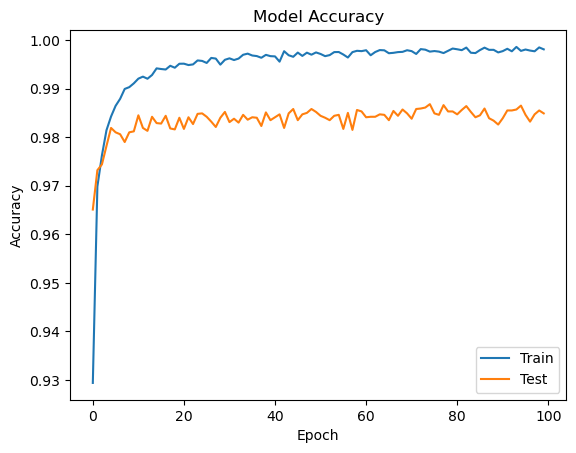

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])

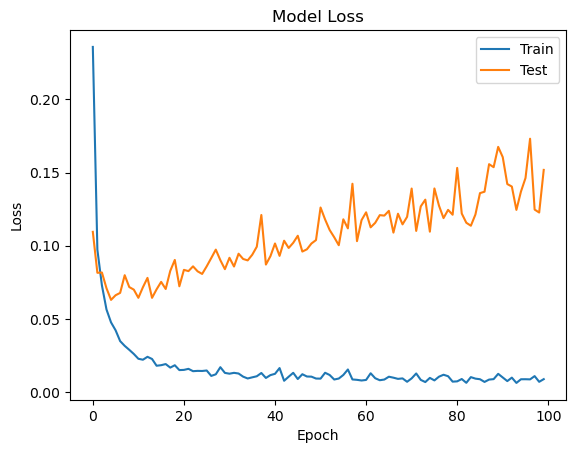

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])

In [24]:
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

614656

In [25]:
batch_size = 100
hidden_units = 256
dropout = 0.45

In [26]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))

In [27]:
history = model.fit(X_train,Y_train,
                   batch_size = 100,
                   epochs =100 ,
                   verbose = 2,
                   validation_data = (X_test,Y_test))

Epoch 1/100
600/600 - 2s - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.1387 - val_accuracy: 0.9836 - 2s/epoch - 3ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1429 - val_accuracy: 0.9859 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0124 - accuracy: 0.9972 - val_loss: 0.1691 - val_accuracy: 0.9847 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.1673 - val_accuracy: 0.9840 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.1539 - val_accuracy: 0.9844 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.1365 - val_accuracy: 0.9853 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.1378 - val_accuracy: 0.9863 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.1491 - val_accuracy: 0.9861 - 2s/epoch - 3ms/step
Epoch 9/100
600/

the accuract has improved to 0.9991 and loss to 0.0092

In [28]:
history.history

{'loss': [0.009400490671396255,
  0.004717153962701559,
  0.012355675920844078,
  0.006875515915453434,
  0.008237188681960106,
  0.009591943584382534,
  0.005489987786859274,
  0.005004617851227522,
  0.009578537195920944,
  0.00833098590373993,
  0.009837706573307514,
  0.010225174017250538,
  0.00931550469249487,
  0.007515422068536282,
  0.00662786141037941,
  0.008763392455875874,
  0.008593120612204075,
  0.009403727948665619,
  0.00777926342561841,
  0.009866227395832539,
  0.007889565080404282,
  0.008563965559005737,
  0.006990591064095497,
  0.008561617694795132,
  0.006684931460767984,
  0.009039998054504395,
  0.009473887272179127,
  0.009617389179766178,
  0.00844969879835844,
  0.006289203185588121,
  0.00909302569925785,
  0.008545818738639355,
  0.01114763505756855,
  0.008263591676950455,
  0.010000448673963547,
  0.009604732505977154,
  0.0099001070484519,
  0.006022126879543066,
  0.007074451074004173,
  0.007818309590220451,
  0.005805836524814367,
  0.0098199658095

In [29]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=100)
print("test loss, test acc:", results)


Evaluate on test data
100/100 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9866
test loss, test acc: [0.2261601835489273, 0.9865999817848206]


In [30]:
print("Generate predictions for 10 samples")
predictions = model.predict(X_test[:10])
print("predictions shape:", predictions.shape)

Generate predictions for 10 samples
1/1 [==============================] - 0s 132ms/step
predictions shape: (10, 256)


changing the optimizer to rmsprop

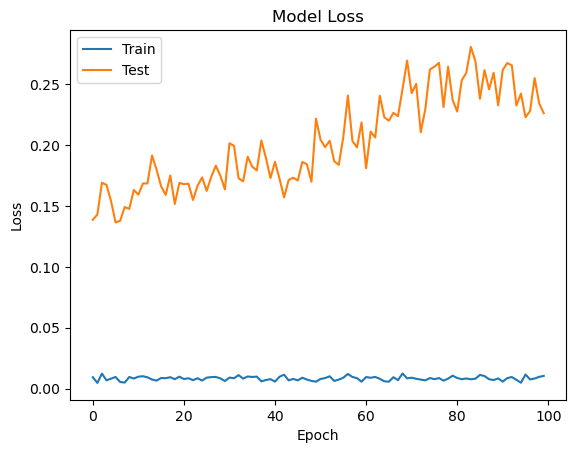

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])